In [2]:
import pandas as pd
import numpy as np

In [3]:
df_final_features = pd.read_csv('02_Features_final.csv')

In [4]:
df_final_features

,customer_ID,P_2Ave3,P_2Min3,P_2Max3,P_2Sum3,P_2Ave6,P_2Min6,P_2Max6,P_2Sum6,P_2Ave9,...,D_68_5.0Response_Rate12,D_68_5.0Ever_Response12,D_68_5.0Apr2018,D_68_6.0Response_Rate6,D_68_6.0Ever_Response6,D_68_6.0Response_Rate12,D_68_6.0Ever_Response12,D_68_6.0Apr2018,target,date
0,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.447801,0.414444,0.477116,1.343404,0.453994,0.407172,0.560474,2.723962,0.472079,...,0.000000,False,0,0.0,False,0.000000,False,0,0,2017-03-11
1,000445609ff2a39d2dd02484899affa5696210a95f6869...,0.976846,0.974383,0.978897,2.930539,0.972001,0.949051,0.986043,5.832008,0.971372,...,0.000000,False,0,1.0,True,1.000000,True,0,0,2017-03-10
2,0004837f0c785928a29a6f83f70f4a1c54caec483a773f...,0.638958,0.634894,0.642295,1.916874,0.640140,0.628740,0.663800,3.840840,0.656560,...,1.000000,True,0,0.0,False,0.000000,False,0,0,2017-03-01
3,0004ec03ca1ab2adb9aa260c61ba5dce8185e19d3ab704...,0.973429,0.963991,0.980221,2.920287,0.970996,0.963991,0.980221,5.825976,0.970050,...,0.583333,True,0,0.0,False,0.416667,True,0,0,2017-03-09
4,00050d84c6d26e26cd2b18c3eed83d3130c270e2361470...,0.993352,0.968914,1.006598,2.980056,0.973982,0.921563,1.006598,5.843892,0.963556,...,0.000000,False,0,1.0,True,1.000000,True,0,0,2017-03-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91778,fffe2bc02423407e33a607660caeed076d713d8a5ad323...,0.407346,0.405106,0.408619,1.222039,0.483217,0.405106,0.643031,2.899303,0.513501,...,0.000000,False,0,0.0,False,0.000000,False,0,1,2017-08-30
91779,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0.842163,0.831279,0.856352,2.526490,0.854855,0.831279,0.868121,5.129130,0.856552,...,0.000000,False,0,1.0,True,1.000000,True,0,0,2017-03-22
91780,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0.793959,0.786806,0.800522,2.381876,0.794153,0.786806,0.800522,3.970766,0.791699,...,1.000000,True,0,0.0,False,0.000000,False,0,0,2017-03-16
91781,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,0.765340,0.754129,0.787439,2.296021,0.777606,0.754129,0.791680,4.665638,0.783375,...,0.000000,False,0,0.0,False,0.000000,False,0,1,2017-03-25


In [5]:
df = df_final_features.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle the dataset

# Calculate indices for splitting
total_rows = len(df)
train_end = int(0.7 * total_rows)
test1_end = train_end + int(0.15 * total_rows)

# Perform the split
train_df = df.iloc[:train_end]
test1_df = df.iloc[train_end:test1_end]
test2_df = df.iloc[test1_end:]

In [6]:
train_df_customer = train_df[['customer_ID','target']]
test1_df_customer = test1_df[['customer_ID','target']]
test2_df_customer = test2_df[['customer_ID','target']]

In [7]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt

In [8]:
# Example columns to drop (update this list according to your dataset)
columns_to_drop = ['customer_ID', 'date']

# X and y for training
X_train = train_df.drop(columns=columns_to_drop + ['target'])  # Drop unnecessary columns
y_train = train_df['target']

# Confirm missing values are NaN (pandas handles missing as NaN by default)
print(X_train.isnull().sum().head())

P_2Ave3    0
P_2Min3    0
P_2Max3    0
P_2Sum3    0
P_2Ave6    0
dtype: int64


In [9]:
# Convert the data to DMatrix format (optional, but recommended for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train, missing=np.nan)

# Train an XGBoost model with default parameters
model1 = xgb.train(params={}, dtrain=dtrain)

# Get feature importance
importance1 = model1.get_score(importance_type='weight')  # You can also try 'gain' or 'cover'

# Convert importance dictionary to dataframe
importance1_df = pd.DataFrame({
    'feature': list(importance1.keys()),
    'importance': list(importance1.values())
})

# Normalize importance to percentages
importance1_df['importance'] = 100 * importance1_df['importance'] / importance1_df['importance'].sum()

# Save feature importance to CSV
importance1_df.to_csv('feature_importance_model1.csv', index=False)

# Preview
importance1_df.head()

,feature,importance
0,P_2Ave3,2.40
1,P_2Min3,1.44
2,P_2Max3,0.16
3,P_2Ave6,0.16
4,P_2Min6,0.16


In [10]:
# Define parameters for model 2
params2 = {
    'eta': 0.5,              # learning rate
    'max_depth': 4,
    'subsample': 0.5,
    'colsample_bytree': 0.5,
    'scale_pos_weight': 5,   # weight for positive class
    'objective': 'binary:logistic',
    'missing': np.nan
}

# Train model 2 with 300 trees
model2 = xgb.train(params=params2, dtrain=dtrain, num_boost_round=300)

# Get feature importance
importance2 = model2.get_score(importance_type='weight')

# Convert to dataframe
importance2_df = pd.DataFrame({
    'feature': list(importance2.keys()),
    'importance': list(importance2.values())
})

# Normalize importance to percentages
importance2_df['importance'] = 100 * importance2_df['importance'] / importance2_df['importance'].sum()

# Save feature importance to CSV
importance2_df.to_csv('feature_importance_model2.csv', index=False)

# Preview
importance2_df.head()

c:\Users\shrey\anaconda3\envs\myenv\lib\site-packages\xgboost\training.py:183: UserWarning: [22:12:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "missing" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,feature,importance
0,P_2Ave3,0.16044
1,P_2Min3,0.20628
2,P_2Max3,0.09168
3,P_2Sum3,0.16044
4,P_2Ave6,0.06876


In [11]:
importance1_df['model'] = 'model1'
importance2_df['model'] = 'model2'
combined_importance = pd.concat([importance1_df, importance2_df], axis=0)
selected_features = combined_importance[combined_importance['importance'] > 0.5]['feature'].unique().tolist()
print(f'Number of selected features: {len(selected_features)}')
print(selected_features)

Number of selected features: 17
['P_2Ave3', 'P_2Min3', 'D_39Ave3', 'D_39Max3', 'D_39Max6', 'B_2Ave3', 'R_1Ave3', 'R_1Max3', 'R_1Sum3', 'S_3Ave12', 'B_3Ave3', 'D_43Ave3', 'D_43Ave12', 'B_4Max3', 'B_4Max6', 'D_46Min3', 'P_3Min12']


In [12]:
# Filter X_train to keep only the selected features
X_train_selected = X_train[selected_features]

# Save or use X_train_selected for further modeling
X_train_selected.to_csv('X_train_selected.csv', index=False)

# Preview
X_train_selected.head()

,P_2Ave3,P_2Min3,D_39Ave3,D_39Max3,D_39Max6,B_2Ave3,R_1Ave3,R_1Max3,R_1Sum3,S_3Ave12,B_3Ave3,D_43Ave3,D_43Ave12,B_4Max3,B_4Max6,D_46Min3,P_3Min12
0,0.782897,0.677923,0.594366,0.620801,0.620801,0.385929,0.007538,0.009787,0.022614,0.433755,0.066734,0.077774,0.095384,0.132969,0.157619,0.417202,-0.028456
1,0.521008,0.474899,0.005756,0.009681,0.009681,1.003987,0.170478,0.505953,0.511433,0.244115,0.006554,0.085423,0.124288,0.317227,0.317227,0.485579,0.347771
2,0.793791,0.738389,0.003721,0.007815,0.007815,0.812160,0.004175,0.009839,0.012526,0.000000,0.003792,0.087909,0.127469,0.041664,0.041664,0.272428,0.402724
3,0.984174,0.971360,0.191492,0.328866,0.328866,1.005207,0.006302,0.008247,0.018905,0.138019,0.008702,0.000000,0.000000,0.035029,0.046822,0.421756,0.456768
4,0.566775,0.548724,0.411449,0.920781,0.920781,0.022238,0.174354,0.509140,0.523062,0.191843,0.520521,0.034886,0.038575,0.586848,0.586848,0.527011,0.325314


In [13]:
import itertools
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_auc_score

num_trees = [50, 100, 300]
learning_rates = [0.01, 0.1]
subsamples = [0.5, 0.8]
colsample_bytrees = [0.5, 1.0]
scale_pos_weights = [1, 5, 10]

param_grid = list(itertools.product(num_trees, learning_rates, subsamples, colsample_bytrees, scale_pos_weights))

results_columns = ['Trees', 'LR', 'Subsample', '% Features', 'Weight of Default', 'AUC Train', 'AUC Test 1', 'AUC Test 2']
results_df = pd.DataFrame(columns=results_columns)

results_file = 'xgboost_grid_search_results.csv'

try:
    results_df = pd.read_csv(results_file)
    print(f"Loaded existing results with {len(results_df)} rows.")
except FileNotFoundError:
    print("No previous results found. Starting fresh.")

Loaded existing results with 0 rows.


In [14]:
# Assume these are already prepared from step 10
# X_train_selected, y_train
# test1_df and test2_df have 'target' column and features

# Prepare training data
X_train_final = X_train[selected_features]
y_train_final = y_train

# Prepare test datasets
X_test1 = test1_df[selected_features]
y_test1 = test1_df['target']

X_test2 = test2_df[selected_features]
y_test2 = test2_df['target']

In [15]:
X_test1_df = test1_df[['customer_ID']].copy() 

In [16]:
results_df = pd.read_csv('xgboost_grid_search_results.csv')

In [17]:
trees = []
# Loop through all parameter combinations
for params in param_grid:
    n_trees, lr, subsample, colsample, pos_weight = params

    # Skip if already done (prevent duplicates)
    existing_row = results_df[
        (results_df['Trees'] == n_trees) &
        (results_df['LR'] == lr) &
        (results_df['Subsample'] == subsample) &
        (results_df['% Features'] == colsample) &
        (results_df['Weight of Default'] == pos_weight)
    ]
    
    if not existing_row.empty:
       print(f"Skipping already evaluated params: {params}")
       continue

    print(f"Training with params: Trees={n_trees}, LR={lr}, Subsample={subsample}, %Features={colsample}, PosWeight={pos_weight}")

    # Define XGBoost params
    xgb_params = {
        'eta': lr,
        'max_depth': 6,  # You can adjust this, or parameterize it too
        'subsample': subsample,
        'colsample_bytree': colsample,
        'scale_pos_weight': pos_weight,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'verbosity': 0,
        'use_label_encoder': False
    }

    # Create DMatrix for better performance
    dtrain = xgb.DMatrix(X_train_final, label=y_train_final, missing=np.nan)
    dtest1 = xgb.DMatrix(X_test1, label=y_test1, missing=np.nan)
    dtest2 = xgb.DMatrix(X_test2, label=y_test2, missing=np.nan)

    # Train the model
    model = xgb.train(params=xgb_params, dtrain=dtrain, num_boost_round=n_trees)


    # Predict probabilities
    y_train_pred = model.predict(dtrain)
    y_test1_pred = model.predict(dtest1)
    y_test2_pred = model.predict(dtest2)

    # Calculate AUC scores
    auc_train = roc_auc_score(y_train_final, y_train_pred)
    auc_test1 = roc_auc_score(y_test1, y_test1_pred)
    auc_test2 = roc_auc_score(y_test2, y_test2_pred)

    print(f'AUC Train: {auc_train:.4f}, AUC Test1: {auc_test1:.4f}, AUC Test2: {auc_test2:.4f}')
    
    trees.append(n_trees)
    
    # Append results to dataframe
    row = {
        'Trees': n_trees,
        'LR': lr,
        'Subsample': subsample,
        '% Features': colsample,
        'Weight of Default': pos_weight,
        'AUC Train': auc_train,
        'AUC Test 1': auc_test1,
        'AUC Test 2': auc_test2
    }

    results_df = pd.concat([results_df, pd.DataFrame([row])], ignore_index=True)

    # Save intermediate results to CSV after each iteration
    results_df.to_csv(results_file,index=False)

Training with params: Trees=50, LR=0.01, Subsample=0.5, %Features=0.5, PosWeight=1
AUC Train: 0.9479, AUC Test1: 0.9451, AUC Test2: 0.9427
Training with params: Trees=50, LR=0.01, Subsample=0.5, %Features=0.5, PosWeight=5


C:\Users\shrey\AppData\Local\Temp\ipykernel_27288\4069396382.py:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([row])], ignore_index=True)


AUC Train: 0.9468, AUC Test1: 0.9441, AUC Test2: 0.9420
Training with params: Trees=50, LR=0.01, Subsample=0.5, %Features=0.5, PosWeight=10
AUC Train: 0.9460, AUC Test1: 0.9435, AUC Test2: 0.9413
Training with params: Trees=50, LR=0.01, Subsample=0.5, %Features=1.0, PosWeight=1
AUC Train: 0.9475, AUC Test1: 0.9443, AUC Test2: 0.9423
Training with params: Trees=50, LR=0.01, Subsample=0.5, %Features=1.0, PosWeight=5
AUC Train: 0.9457, AUC Test1: 0.9428, AUC Test2: 0.9402
Training with params: Trees=50, LR=0.01, Subsample=0.5, %Features=1.0, PosWeight=10
AUC Train: 0.9447, AUC Test1: 0.9421, AUC Test2: 0.9392
Training with params: Trees=50, LR=0.01, Subsample=0.8, %Features=0.5, PosWeight=1
AUC Train: 0.9480, AUC Test1: 0.9450, AUC Test2: 0.9428
Training with params: Trees=50, LR=0.01, Subsample=0.8, %Features=0.5, PosWeight=5
AUC Train: 0.9470, AUC Test1: 0.9442, AUC Test2: 0.9419
Training with params: Trees=50, LR=0.01, Subsample=0.8, %Features=0.5, PosWeight=10
AUC Train: 0.9465, AUC T

In [18]:
results_df.sort_values(by=['AUC Train','AUC Test 1','AUC Test 2'],ascending=False)

,Trees,LR,Subsample,% Features,Weight of Default,AUC Train,AUC Test 1,AUC Test 2
69,300,0.10,0.8,1.0,1,0.980983,0.946963,0.945436
70,300,0.10,0.8,1.0,5,0.980458,0.946755,0.944956
63,300,0.10,0.5,1.0,1,0.979723,0.946277,0.943999
64,300,0.10,0.5,1.0,5,0.979300,0.945114,0.944770
71,300,0.10,0.8,1.0,10,0.978801,0.946092,0.944079
...,...,...,...,...,...,...,...,...
2,50,0.01,0.5,0.5,10,0.946048,0.943539,0.941278
4,50,0.01,0.5,1.0,5,0.945693,0.942825,0.940180
10,50,0.01,0.8,1.0,5,0.945246,0.941746,0.939612
5,50,0.01,0.5,1.0,10,0.944683,0.942148,0.939225


In [19]:
X_train_final

,P_2Ave3,P_2Min3,D_39Ave3,D_39Max3,D_39Max6,B_2Ave3,R_1Ave3,R_1Max3,R_1Sum3,S_3Ave12,B_3Ave3,D_43Ave3,D_43Ave12,B_4Max3,B_4Max6,D_46Min3,P_3Min12
0,0.782897,0.677923,0.594366,0.620801,0.620801,0.385929,0.007538,0.009787,0.022614,0.433755,0.066734,0.077774,0.095384,0.132969,0.157619,0.417202,-0.028456
1,0.521008,0.474899,0.005756,0.009681,0.009681,1.003987,0.170478,0.505953,0.511433,0.244115,0.006554,0.085423,0.124288,0.317227,0.317227,0.485579,0.347771
2,0.793791,0.738389,0.003721,0.007815,0.007815,0.812160,0.004175,0.009839,0.012526,0.000000,0.003792,0.087909,0.127469,0.041664,0.041664,0.272428,0.402724
3,0.984174,0.971360,0.191492,0.328866,0.328866,1.005207,0.006302,0.008247,0.018905,0.138019,0.008702,0.000000,0.000000,0.035029,0.046822,0.421756,0.456768
4,0.566775,0.548724,0.411449,0.920781,0.920781,0.022238,0.174354,0.509140,0.523062,0.191843,0.520521,0.034886,0.038575,0.586848,0.586848,0.527011,0.325314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64243,0.431645,0.426742,0.123236,0.359945,0.359945,0.025799,0.007694,0.008167,0.023082,0.145873,0.547316,0.312475,0.378921,0.457437,0.457437,0.533242,0.476689
64244,0.066233,0.058398,0.318558,0.618435,0.625378,0.040275,0.170034,0.500269,0.510102,0.634109,0.150255,0.874357,1.014656,0.275209,0.275209,0.595483,-0.258743
64245,0.992968,0.992198,0.290353,0.448092,0.448092,1.006703,0.007768,0.009566,0.023305,0.126286,0.004400,0.033579,0.042948,0.013580,0.016197,0.000000,0.650813
64246,0.698149,0.237445,0.023022,0.064407,0.326073,1.003292,0.337463,1.002837,1.012390,0.075563,0.007182,0.013294,0.014274,0.033466,0.084805,0.000000,-0.984632


In [20]:
# Define XGBoost params
xgb_params = {
        'eta': 0.1,
        'max_depth': 6,  # You can adjust this, or parameterize it too
        'subsample': 0.8,
        'colsample_bytree': 1,
        'scale_pos_weight': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'verbosity': 0,
        'use_label_encoder': False
}

model = xgb.train(params=xgb_params, dtrain=dtrain, num_boost_round=300)

In [21]:
y_train_pred = model.predict(dtrain)
y_test1_pred = model.predict(dtest1)
y_test2_pred = model.predict(dtest2)

In [22]:
train_pred_res = pd.DataFrame(data=y_train_pred,columns=['scores'])

train_pred_res['customer_ID'] = train_df_customer['customer_ID'].to_list()
train_pred_res['target'] = train_df_customer['target'].to_list()

train_pred_res.to_csv('xgBoost_Pred.csv')

In [23]:
test1_pred_res = pd.DataFrame(data=y_test1_pred,columns=['scores'])

test1_pred_res['customer_ID'] = test1_df_customer['customer_ID'].to_list()
test1_pred_res['target'] = test1_df_customer['target'].to_list()

test1_pred_res.to_csv('xgBoost_test1_pred.csv')


In [24]:
test2_pred_res = pd.DataFrame(data=y_test2_pred,columns=['scores'])

test2_pred_res['customer_ID'] = test2_df_customer['customer_ID'].to_list()
test2_pred_res['target'] = test2_df_customer['target'].to_list()

test2_pred_res.to_csv('xgBoost_test2_pred.csv')
test2_pred_res

,scores,customer_ID,target
0,0.010555,9826f53692478885492972bd237a1dfc0d1755abea34d1...,0
1,0.536312,a713e529010ece35d804cd3434a9bb5706fcece597ed60...,0
2,0.257692,49eb51f204e83a3b585209edb41225d76ccf3dd13bf5bb...,0
3,0.355511,5ff3c4d35bea79f19a0851ee0cc4b8fa102f0ee95115c1...,0
4,0.633567,0393a48f7eadfc905b03f8b80b3d974ed7789d88401101...,1
...,...,...,...
13763,0.001284,11e9d1330e624aad3c59d323da4b7faf37da9bb0c260c1...,0
13764,0.032491,9908dd887b57ee8319552bb9e911c47eb4df5e9061b5e3...,0
13765,0.093408,d6875f0368d95a15ce9c36aadd9b5bc814f2c3f4e0bbc1...,0
13766,0.004301,02595bb82cde7cb2ef3fddea0677b49e01dedec63da100...,0


In [25]:
model.save_model('xgboost_model_20250401.json')

In [26]:
train_df.to_csv('train_df.csv')

In [27]:
!pip install shap

In [28]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [29]:
import shap
import pandas as pd
import numpy as np
from xgboost import XGBClassifier

# Re-train XGBClassifier for SHAP compatibility
shap_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.8,
    scale_pos_weight=3,
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42
)
shap_model.fit(X_train_final, y_train_final)

# 🧠 Run SHAP
explainer = shap.Explainer(shap_model, X_train_final)
shap_values = explainer(X_train_final)

# 📊 SHAP importance
shap_importance = pd.DataFrame({
    "Feature": X_train_final.columns,
    "Mean |SHAP|": np.abs(shap_values.values).mean(axis=0)
})

# 📈 Full descriptive statistics (incl. 1%, 5%, 25%, 50%, 75%, 99%)
desc_stats = X_train_final.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.99]).T.reset_index()
desc_stats.columns = [
    "Feature", "Count", "Mean", "Std", "Min", "1%", "5%", "25%", "Median", "75%", "99%", "Max"
]

# 🔗 Merge SHAP + Stats (without % missing)
final_shap_summary = shap_importance.merge(desc_stats, on="Feature")

# 💾 Save to Excel
final_shap_summary.to_excel("Full_SHAP_Stats.xlsx", index=False)

# 👀 Preview top rows
final_shap_summary.head()


c:\Users\shrey\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|===================| 64240/64248 [08:38<00:00]        

,Feature,Mean |SHAP|,Count,Mean,Std,Min,1%,5%,25%,Median,75%,99%,Max
0,P_2Ave3,0.739086,64248.0,0.633634,0.263685,-0.366848,-0.045514,0.142550,0.448151,0.677659,0.858786,1.004499,1.009965
1,P_2Min3,0.611443,64248.0,0.609315,0.273377,-0.420581,-0.105106,0.086950,0.421151,0.655024,0.840732,1.001447,1.009965
2,D_39Ave3,0.122494,64248.0,0.184167,0.276383,0.000007,0.001838,0.003268,0.006550,0.084197,0.268557,1.503917,4.449161
3,D_39Max3,0.168611,64248.0,0.334166,0.445368,0.000007,0.002849,0.005312,0.009275,0.206923,0.530282,2.295495,5.268649
4,D_39Max6,0.129803,64248.0,0.417674,0.463601,0.000007,0.005115,0.007495,0.033055,0.357742,0.621701,2.415726,5.268649


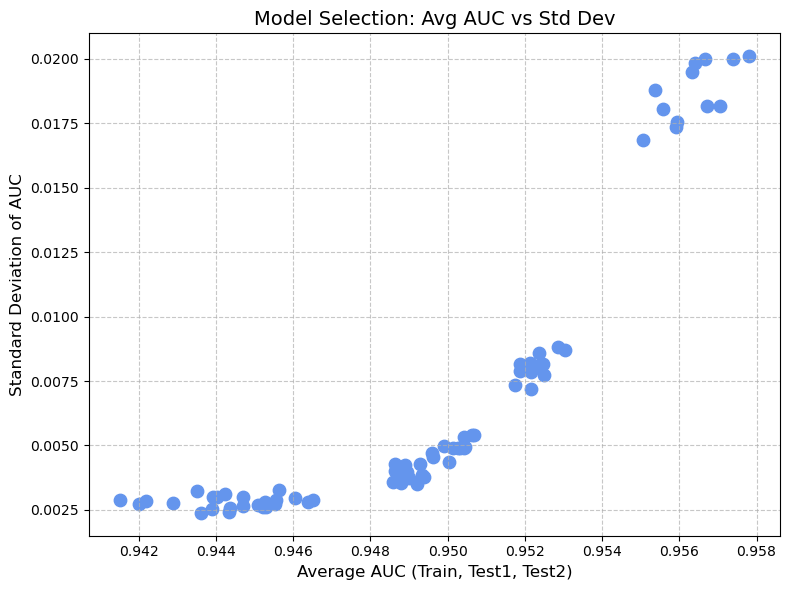

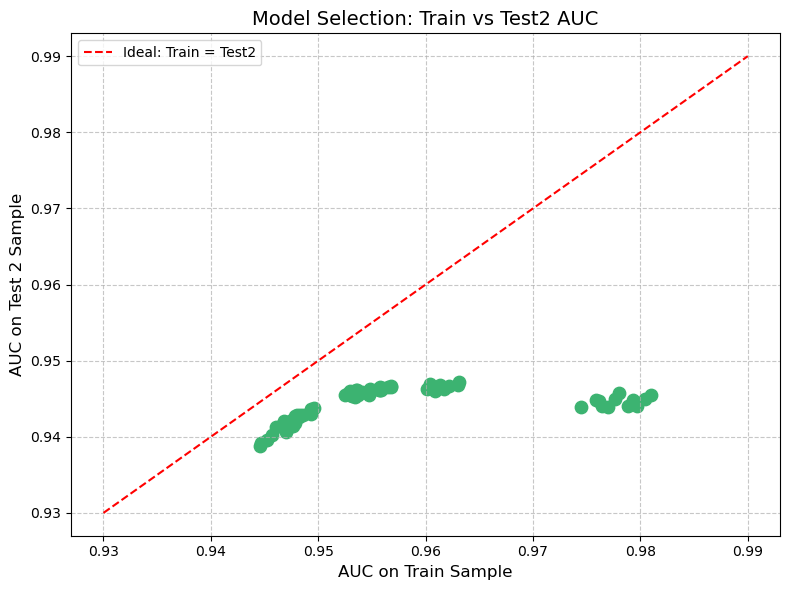

In [32]:
import matplotlib.pyplot as plt

# === STEP 1: Compute AUC Avg and Std Dev ===
results_df['AUC Avg'] = results_df[['AUC Train', 'AUC Test 1', 'AUC Test 2']].mean(axis=1)
results_df['AUC Std'] = results_df[['AUC Train', 'AUC Test 1', 'AUC Test 2']].std(axis=1)

# === PLOT 1: Avg AUC vs Std Dev ===
plt.figure(figsize=(8, 6))
plt.scatter(results_df['AUC Avg'], results_df['AUC Std'], color='cornflowerblue', s=80)
plt.xlabel('Average AUC (Train, Test1, Test2)', fontsize=12)
plt.ylabel('Standard Deviation of AUC', fontsize=12)
plt.title('Model Selection: Avg AUC vs Std Dev', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# === PLOT 2: Train AUC vs Test 2 AUC ===
plt.figure(figsize=(8, 6))
plt.scatter(results_df['AUC Train'], results_df['AUC Test 2'], color='mediumseagreen', s=80)
plt.plot([0.93, 0.99], [0.93, 0.99], 'r--', label='Ideal: Train = Test2')
plt.xlabel('AUC on Train Sample', fontsize=12)
plt.ylabel('AUC on Test 2 Sample', fontsize=12)
plt.title('Model Selection: Train vs Test2 AUC', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



C:\Users\shrey\AppData\Local\Temp\ipykernel_27288\2019519728.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby('bin')['default'].mean()


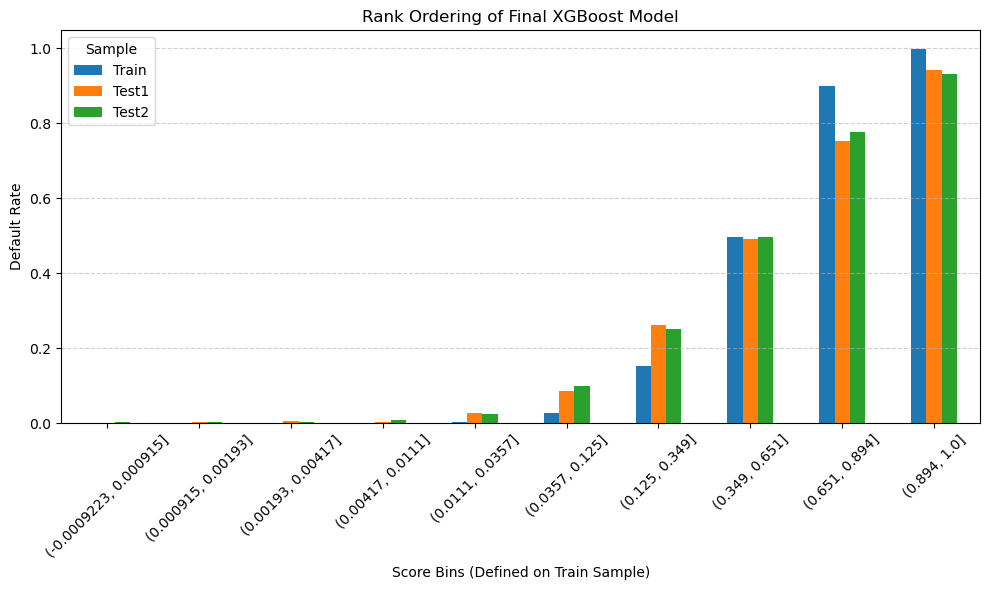


Best Model Parameters:
Model Number         69
n_estimators         300
learning_rate        0.1
Subsample %          80.0%
Features             100.0%
% Weight of Default  1
AUC Train            0.980983
AUC Test 1           0.946963
AUC Test 2           0.945436


In [35]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# STEP 1: Find the best model from results_df (by highest average AUC)
results_df['Average AUC'] = results_df[['AUC Train', 'AUC Test 1', 'AUC Test 2']].mean(axis=1)
results_df['Std AUC'] = results_df[['AUC Train', 'AUC Test 1', 'AUC Test 2']].std(axis=1)
results_df['AUC Diff'] = results_df['AUC Train'] - results_df['AUC Test 2']
best_row = results_df.loc[results_df['Average AUC'].idxmax()].copy()

# STEP 2: Retrain the best model using the same parameters
params = {
    'eta': best_row['LR'],
    'max_depth': 6,
    'subsample': best_row['Subsample'],
    'colsample_bytree': best_row['% Features'],
    'scale_pos_weight': best_row['Weight of Default'],
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'verbosity': 0
}

dtrain = xgb.DMatrix(X_train_final, label=y_train_final)
dtest1 = xgb.DMatrix(X_test1, label=y_test1)
dtest2 = xgb.DMatrix(X_test2, label=y_test2)

final_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=int(best_row['Trees']))

# STEP 3: Predict probabilities
y_train_pred = final_model.predict(dtrain)
y_test1_pred = final_model.predict(dtest1)
y_test2_pred = final_model.predict(dtest2)

# STEP 4: Define bins using the predicted scores on the train sample
bin_edges = np.quantile(y_train_pred, q=np.linspace(0, 1, 11))  # 10 bins

# STEP 5: Define function to calculate default rate per bin
def default_rate_per_bin(y_true, y_pred, bins):
    bin_labels = pd.cut(y_pred, bins=bins, include_lowest=True)
    df = pd.DataFrame({'bin': bin_labels, 'default': y_true})
    return df.groupby('bin')['default'].mean()

# STEP 6: Compute rank ordering (default rates by score bin)
train_rank = default_rate_per_bin(y_train_final, y_train_pred, bin_edges)
test1_rank = default_rate_per_bin(y_test1, y_test1_pred, bin_edges)
test2_rank = default_rate_per_bin(y_test2, y_test2_pred, bin_edges)

# STEP 7: Combine into a DataFrame for plotting
rank_df = pd.DataFrame({
    'Train': train_rank,
    'Test1': test1_rank,
    'Test2': test2_rank
})

# STEP 8: Plot bar chart
rank_df.plot(kind='bar', figsize=(10, 6))
plt.title('Rank Ordering of Final XGBoost Model')
plt.xlabel('Score Bins (Defined on Train Sample)')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Sample')
plt.tight_layout()
plt.show()

# STEP 9 (Optional): Print summary block
print("\nBest Model Parameters:")
print(f"Model Number         {best_row.name}")
print(f"n_estimators         {int(best_row['Trees'])}")
print(f"learning_rate        {best_row['LR']}")
print(f"Subsample %          {best_row['Subsample'] * 100:.1f}%")
print(f"Features             {best_row['% Features'] * 100:.1f}%")
print(f"% Weight of Default  {int(best_row['Weight of Default'])}")
print(f"AUC Train            {roc_auc_score(y_train_final, y_train_pred):.6f}")
print(f"AUC Test 1           {roc_auc_score(y_test1, y_test1_pred):.6f}")
print(f"AUC Test 2           {roc_auc_score(y_test2, y_test2_pred):.6f}")

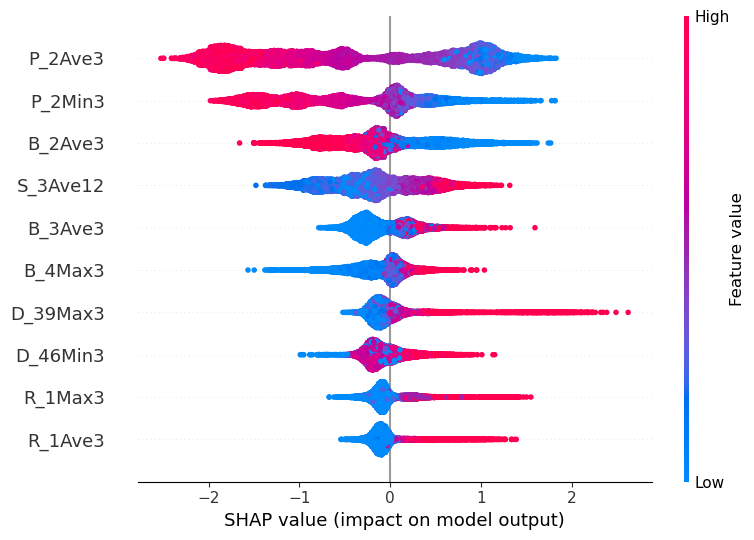

In [46]:
import shap

# Create a TreeExplainer for your final XGBoost model
explainer = shap.TreeExplainer(final_model)

# Compute SHAP values for the full Test2 dataset
shap_values = explainer.shap_values(X_test2)

# Plot only the top 10 features in a SHAP beeswarm plot
shap.summary_plot(
    shap_values,
    X_test2,
    plot_type="dot",   # dot = beeswarm
    max_display=10     # show only top 10 features
)



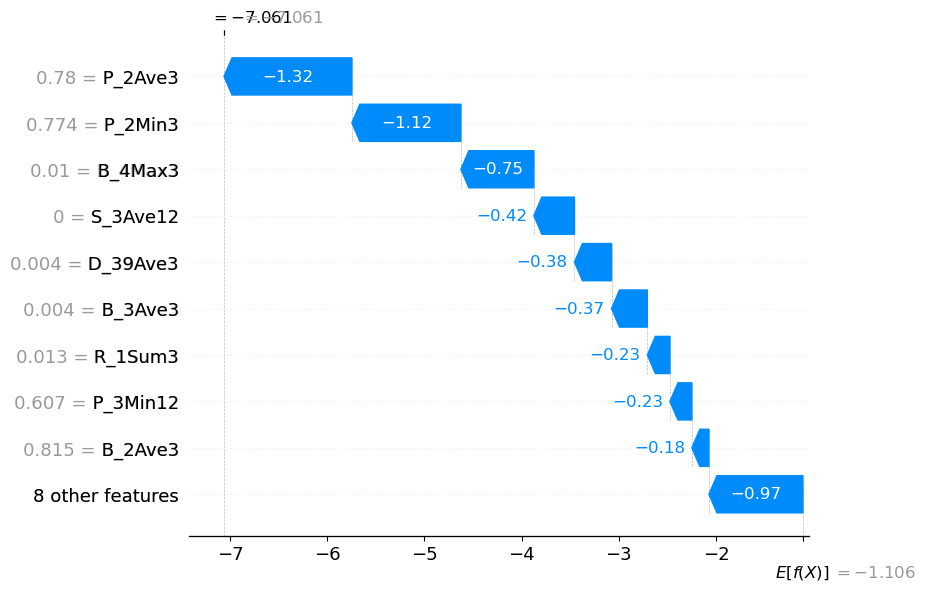

In [44]:
import shap

# Choose a single observation (use integer index)
i = 10
observation = X_test2.iloc[i]

# SHAP TreeExplainer
explainer = shap.TreeExplainer(final_model)

# Compute SHAP values (array output for all test rows)
shap_values = explainer.shap_values(X_test2)

# ✅ WORKING waterfall plot with correct parameters
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[i],                          # SHAP values for one observation
        base_values=explainer.expected_value,           # single scalar (no indexing!)
        data=observation.values,                        # feature values (array)
        feature_names=observation.index.tolist()        # feature names
    )
)
